In [1]:
from scrapper import top100_crypto_7d, top100_crypto_names, top100_crypto_prices, top100_crypto_marketcap, top100_crypto_volume24h
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

[-5.42, -3.08, 0.0, -3.64, -0.0, -4.03, -0.05, -5.44, -6.63, 4.27, -11.88, -0.41, 2.6, -4.1, -12.81, 0.22, 0.01, -7.12, -3.39, -5.5, 3.64, -0.36, -6.84, -9.06, -6.45, 3.29, -8.15, -4.27, -21.63, -2.04, 0.47, -0.59, -10.65, 4.49, -10.21, 2.5, 2.33, -7.94, -9.96, 62.92, -8.9, -24.04, 5.7, 2.42, -8.31, 1.92, -1.43, 5.56, -2.2, -7.91, 4.81, -0.76, 1.4, -0.07, -0.85, 3.49, -12.81, -3.47, -3.1, 17.34, -4.02, 8.02, -6.8, -0.42, 2.55, -4.18, 12.3, -3.25, -6.43, -1.84, 1.56, -4.32, -11.43, -3.57, -11.27, -0.97, -6.62, 123.72, -7.42, -1.37, -2.32, 4.23, -13.44, -4.5, 1.08, -15.6, -16.13, 1.16, -19.64, 6.6, 0.42, 8.38, -9.24, 3.43, -11.93, -3.54, 22.62, -7.28, -3.0, -11.3]


# Creating Dataframe

In [2]:
column_names = ['Name', 'Price', 'Market Cap', 'Volume 24h', '7d% Change']
top100_crypto_df = pd.DataFrame(columns=column_names)
top100_crypto_df['Name'] = top100_crypto_names
top100_crypto_df['Price'] = top100_crypto_prices
top100_crypto_df['Market Cap'] = top100_crypto_marketcap
top100_crypto_df['Volume 24h'] = top100_crypto_volume24h
top100_crypto_df['7d% Change'] = top100_crypto_7d
# Fix the error name 'top100_crypto_df' is not defined


In [3]:
top100_crypto_df.head()

df_checkpoint = top100_crypto_df.copy()
df_checkpoint.info()
# Style market cap and volume24h columns so numbers are displayed properly
df_checkpoint['Volume 24h'] = df_checkpoint['Volume 24h'].apply(lambda x: x/1000000000)
df_checkpoint['Market Cap'] = df_checkpoint['Market Cap'].apply(lambda x: x/1000000000)
#change column names volume 24h and market cap to volume 24h (billion) and market cap (billion)
df_checkpoint.rename(columns={'Volume 24h': 'Volume 24h (billion)', 'Market Cap': 'Market Cap (billion)'}, inplace=True)
df_checkpoint['Market Cap (billion)'] = df_checkpoint['Market Cap (billion)'].apply(lambda x: round(x, 2))
df_checkpoint['Volume 24h (billion)'] = df_checkpoint['Volume 24h (billion)'].apply(lambda x: round(x, 2))
df_checkpoint.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        100 non-null    object 
 1   Price       100 non-null    float64
 2   Market Cap  100 non-null    float64
 3   Volume 24h  100 non-null    float64
 4   7d% Change  100 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


,Name,Price,Market Cap (billion),Volume 24h (billion),7d% Change
0,Bitcoin,22542.91863,434.76,28.40,-5.42
1,Ethereum,1624.65457,198.82,7.85,-3.08
2,Tether,1.00015,68.19,40.34,0.00
3,BNB,317.17615,50.08,0.64,-3.64
4,USD Coin,1.00003,41.52,3.73,-0.00


In [4]:
# Let's group the crypto that have 7d% change more than 10%
top10_growers_7d = df_checkpoint[df_checkpoint['7d% Change'] > 10]
top10_growers_7d

,Name,Price,Market Cap (billion),Volume 24h (billion),7d% Change
39,The Graph,0.15905,1.40,0.40,62.92
59,ImmutableX,1.02173,0.81,0.08,17.34
66,Neo,9.82318,0.69,0.24,12.30
77,SingularityNET,0.44248,0.53,0.34,123.72
96,Oasis Network,0.06974,0.40,0.18,22.62


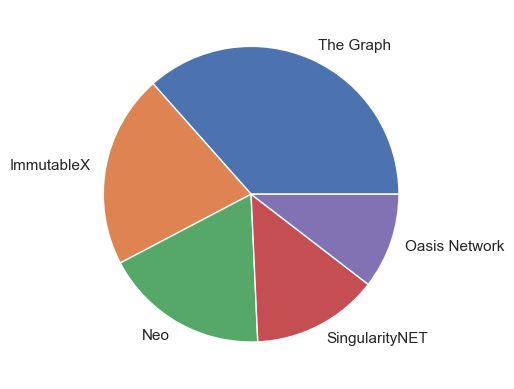

In [5]:
# Let's create a pie chart to visualize the top 10 crypto that have 7d% change more than 10%, display the market cap of each crypto in percentage and value
values = top10_growers_7d['Market Cap (billion)']
labels = top10_growers_7d['Name']
plt.pie(values, labels=labels)
plt.show()
